W pliku **Historia_przejazdow.csv** znajdziesz dane na temat wypożyczeń Wrocławskich Rowerów Miejskich - aktualne dane możesz znaleźć [tutaj](https://www.wroclaw.pl/open-data/dataset/wrmprzejazdy_data). Jeżeli masz problemy z polskimi literami, to plik jest kodowany za pomocą kodowania 'Windows-1250'.

Przeczytaj dane z pliku, a następnie wybierz tylko te, w których stacje wynajmu i zwrotu są takie same, a wypożyczenia krótsze niż 100 minut. Pokaż na wykresie ile było wypożyczeń o danym czasie trwania (pierwszy słupek: wypożyczenia o czasie trwania jednej minuty, drugi - dwóch minut, itd.).

Wypożyczenia które zaczynają się i kończą na tej samej stacji oraz trwają nie dłużej niż 3 minuty to prawdopodobnie wypożyczenia uszkodzonych rowerów, które użytkownik oddaje zaraz po tym jak zda sobie sprawę z awarii. Narysuj czerwoną linię, która oddzieli wypożyczenia krótsze i dłuższe od 3 minut. 

Dodaj też do niej adnotację tłumaczącą czym jest ta linia.

In [26]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

In [40]:
df = pd.read_csv(os.path.join("..", "01_Dane do wykresów", "Historia_przejazdow.csv"), encoding="Windows-1250")

In [41]:
df.head()

,UID wynajmu,Numer roweru,Data wynajmu,Data zwrotu,Stacja wynajmu,Stacja zwrotu,Czas trwania
0,112512738,57243,2021-03-03 23:41:47,2021-03-04 00:00:34,Plac Grunwaldzki / Polaka,Poza stacją,19
1,112512783,57434,2021-03-03 23:46:14,2021-03-04 00:00:41,Bezpieczna/Jugosławiańska,Kurkowa / Dubois,15
2,112512778,650040,2021-03-03 23:45:30,2021-03-04 00:02:33,al. Kochanowskiego / Kopernika,Rondo Reagana,18
3,112512869,57441,2021-03-03 23:53:59,2021-03-04 00:05:08,Plac Świętego Macieja / Trzebnicka,Nowowiejska / Górnickiego,12
4,112512830,651044,2021-03-03 23:50:10,2021-03-04 00:07:12,Powstańców Śląskich/Orla,Szewska / Kazimierza Wielkiego,18


In [42]:
df.sample(10)

,UID wynajmu,Numer roweru,Data wynajmu,Data zwrotu,Stacja wynajmu,Stacja zwrotu,Czas trwania
2028,112535881,651128,2021-03-04 16:37:08,2021-03-04 16:45:55,"Grochowa / Jemiołowa,",Szczęśliwa (Sky Tower),9
2388,112539889,650178,2021-03-04 17:52:29,2021-03-04 18:08:02,Śrubowa / Strzegomska,Świdnicka / Piłsudskiego (Hotel Scandic),16
1168,112528504,57980,2021-03-04 14:05:55,2021-03-04 14:07:56,Borowska (Uniw. Szpital Kliniczny),Borowska (Uniw. Szpital Kliniczny),3
765,112522976,650105,2021-03-04 11:30:44,2021-03-04 11:38:08,Rondo Reagana,Poza stacją,8
2868,112547044,650466,2021-03-04 21:09:02,2021-03-04 21:14:56,"Dworzec Główny, południe",Hubska / Prudnicka,6
3015,112548535,650429,2021-03-04 23:03:52,2021-03-04 23:06:18,Piaskowa / św. Ducha,Drobnera / Plac Bema,3
1038,112527237,651364,2021-03-04 13:36:07,2021-03-04 13:37:42,Graniczna / Strzegomska,Graniczna / Strzegomska,2
771,112522669,650090,2021-03-04 11:20:13,2021-03-04 11:39:32,Koszarowa / UWr,Rondo Reagana,20
34,112513315,650857,2021-03-04 01:03:44,2021-03-04 01:09:49,Drobnera / Plac Bema,Jagiełły / Dmowskiego,7
2581,112541504,57065,2021-03-04 18:24:10,2021-03-04 19:04:17,Drobnera / Plac Bema,Drobnera / Plac Bema,41


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   UID wynajmu     3067 non-null   int64 
 1   Numer roweru    3067 non-null   int64 
 2   Data wynajmu    3067 non-null   object
 3   Data zwrotu     3067 non-null   object
 4   Stacja wynajmu  3067 non-null   object
 5   Stacja zwrotu   3067 non-null   object
 6   Czas trwania    3067 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 167.9+ KB


#### powyżej widać, że w danych jest coś nie tak - daty są object a powinny mieć format daty; da się to zrobić przy wczytywaniu danych, jedna w tym przykłądzie zrobię to poniżej 'ręcznie' ;)


In [44]:
# zmiana formatu danych object na datowy:
df["Data wynajmu"] = pd.to_datetime(df["Data wynajmu"])

In [45]:
df["Data zwrotu"] = pd.to_datetime(df["Data zwrotu"])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3067 entries, 0 to 3066
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   UID wynajmu     3067 non-null   int64         
 1   Numer roweru    3067 non-null   int64         
 2   Data wynajmu    3067 non-null   datetime64[ns]
 3   Data zwrotu     3067 non-null   datetime64[ns]
 4   Stacja wynajmu  3067 non-null   object        
 5   Stacja zwrotu   3067 non-null   object        
 6   Czas trwania    3067 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 167.9+ KB


In [47]:
df.head

<bound method NDFrame.head of       UID wynajmu  Numer roweru        Data wynajmu         Data zwrotu  \
0       112512738         57243 2021-03-03 23:41:47 2021-03-04 00:00:34   
1       112512783         57434 2021-03-03 23:46:14 2021-03-04 00:00:41   
2       112512778        650040 2021-03-03 23:45:30 2021-03-04 00:02:33   
3       112512869         57441 2021-03-03 23:53:59 2021-03-04 00:05:08   
4       112512830        651044 2021-03-03 23:50:10 2021-03-04 00:07:12   
...           ...           ...                 ...                 ...   
3062    112548936         57511 2021-03-04 23:47:37 2021-03-04 23:52:25   
3063    112548810         57137 2021-03-04 23:33:15 2021-03-04 23:52:42   
3064    112548934        651243 2021-03-04 23:47:25 2021-03-04 23:56:43   
3065    112548972        650956 2021-03-04 23:51:43 2021-03-04 23:58:58   
3066    112548907         57625 2021-03-04 23:44:16 2021-03-04 23:59:50   

                                Stacja wynajmu  \
0                  

In [48]:
df.head()

,UID wynajmu,Numer roweru,Data wynajmu,Data zwrotu,Stacja wynajmu,Stacja zwrotu,Czas trwania
0,112512738,57243,2021-03-03 23:41:47,2021-03-04 00:00:34,Plac Grunwaldzki / Polaka,Poza stacją,19
1,112512783,57434,2021-03-03 23:46:14,2021-03-04 00:00:41,Bezpieczna/Jugosławiańska,Kurkowa / Dubois,15
2,112512778,650040,2021-03-03 23:45:30,2021-03-04 00:02:33,al. Kochanowskiego / Kopernika,Rondo Reagana,18
3,112512869,57441,2021-03-03 23:53:59,2021-03-04 00:05:08,Plac Świętego Macieja / Trzebnicka,Nowowiejska / Górnickiego,12
4,112512830,651044,2021-03-03 23:50:10,2021-03-04 00:07:12,Powstańców Śląskich/Orla,Szewska / Kazimierza Wielkiego,18


In [49]:
df.columns

Index(['UID wynajmu', 'Numer roweru', 'Data wynajmu', 'Data zwrotu',
       'Stacja wynajmu', 'Stacja zwrotu', 'Czas trwania'],
      dtype='object')

In [53]:
df_custom = df.loc[df["Stacja wynajmu"] == df["Stacja zwrotu"]]

In [54]:
df_custom.shape

(436, 7)

In [59]:
# iloc pobiera dane po indeksie:
#[0] to jest pierwszy wiersz
df_custom.iloc[0]

UID wynajmu                        112512995
Numer roweru                           57280
Data wynajmu             2021-03-04 00:08:56
Data zwrotu              2021-03-04 00:10:20
Stacja wynajmu    Nowowiejska / Wyszyńskiego
Stacja zwrotu     Nowowiejska / Wyszyńskiego
Czas trwania                               2
Name: 7, dtype: object

In [61]:
# weryfikuję tylko na jednym rekordzie co dostanę jako wynik:
df_custom.iloc[0]["Data zwrotu"] - df_custom.iloc[0]["Data wynajmu"]

Timedelta('0 days 00:01:24')

In [64]:
# teraz chcę wyłuskać z timedelta tylko minuty, bez dni:
(df_custom.iloc[0]["Data zwrotu"] - df_custom.iloc[0]["Data wynajmu"]).seconds // 60

# dzielenie normalne to jeden slash / (dzielenie do float'a), natomiast podwójny slash // to dzielenie do int'a (bez reszty) - bo w zadaniu słupki mają być pełnominutowe :)

1

In [67]:
# 100 minut - używam dt.seconds
df_custom = df_custom.loc[(df_custom["Data zwrotu"] - df_custom["Data wynajmu"]).dt.seconds // 60 < 100]

In [69]:
df_custom.shape

(427, 7)

In [70]:
# spr. czy w df_custom są wpisy dla powyżej 100 min (bo nie powinno ich tam być :) )
df_custom[df_custom["Czas trwania"] > 100]

,UID wynajmu,Numer roweru,Data wynajmu,Data zwrotu,Stacja wynajmu,Stacja zwrotu,Czas trwania


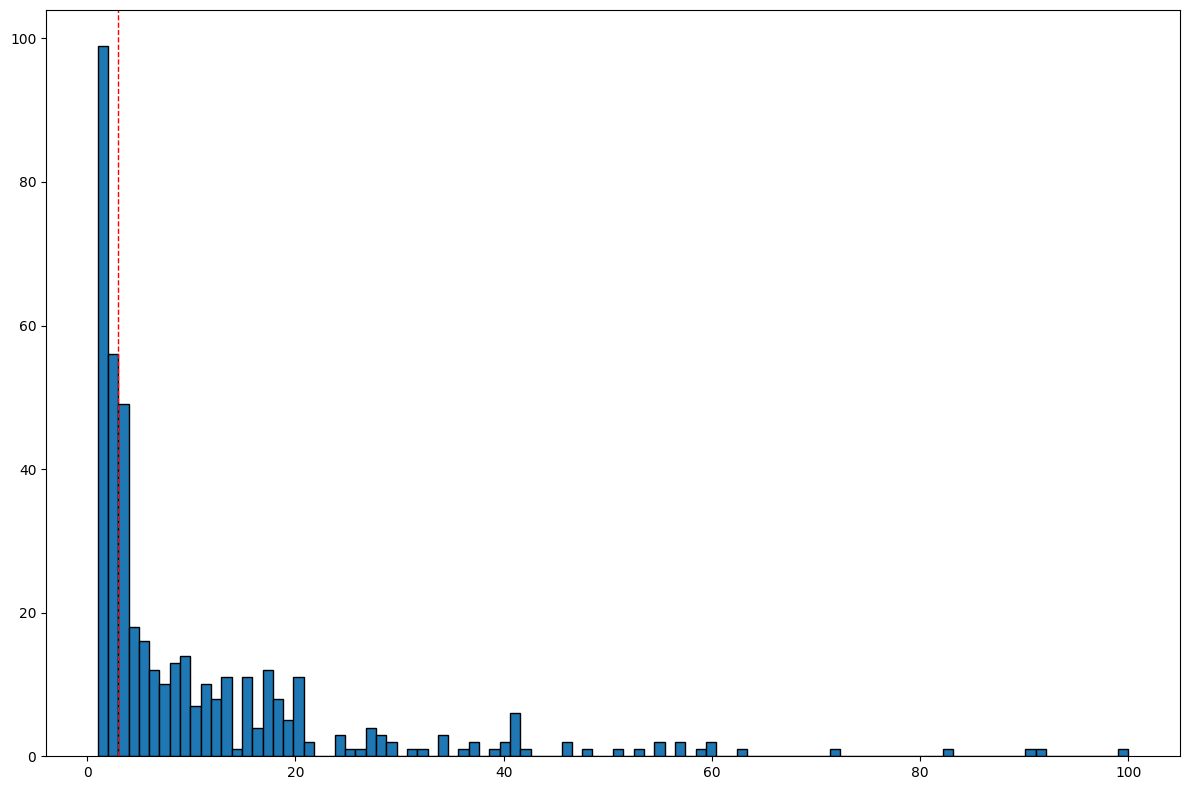

In [78]:
# bins - koszyczki, 100 bo jeden słupek ma być jedną minutą
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(df_custom["Czas trwania"], bins=100, edgecolor="black")

# pionowa czyli wertical, x to 3 - bo od 3 minut, linewidth to szerokość tej linii
ax.axvline(3, color="red", linestyle="--", linewidth=1)





plt.tight_layout()
plt.show()